In [6]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Load dataset
df = pd.read_csv('data/raw_student_spending.csv')

In [3]:
# View dataset
df.head

<bound method NDFrame.head of      Unnamed: 0  age      gender year_in_school             major  \
0             0   19  Non-binary       Freshman        Psychology   
1             1   24      Female         Junior         Economics   
2             2   24  Non-binary         Junior         Economics   
3             3   23      Female         Senior  Computer Science   
4             4   20      Female         Senior  Computer Science   
..          ...  ...         ...            ...               ...   
995         995   22      Female         Senior           Biology   
996         996   19      Female         Senior           Biology   
997         997   20        Male         Junior         Economics   
998         998   22  Non-binary         Senior         Economics   
999         999   24  Non-binary      Sophomore  Computer Science   

     monthly_income  financial_aid  tuition  housing  food  transportation  \
0               958            270     5939      709   296     

In [4]:
# View statistics of dataset
df.describe()

,Unnamed: 0,age,monthly_income,financial_aid,tuition,housing,food,transportation,books_supplies,entertainment,personal_care,technology,health_wellness,miscellaneous
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,21.675000,1020.650000,504.771000,4520.395000,696.00600,252.642000,124.63700,174.761000,84.814000,60.699000,178.304000,114.310000,108.910000
std,288.819436,2.322664,293.841161,287.092575,860.657944,171.21862,86.949606,43.55799,72.404518,37.970451,22.898007,71.744441,49.591544,52.412221
min,0.000000,18.000000,501.000000,0.000000,3003.000000,401.00000,100.000000,50.00000,50.000000,20.000000,20.000000,50.000000,30.000000,20.000000
25%,249.750000,20.000000,770.750000,261.000000,3779.750000,538.75000,175.000000,88.00000,112.000000,54.000000,41.000000,114.000000,73.000000,63.750000
50%,499.500000,22.000000,1021.000000,513.000000,4547.500000,704.50000,255.000000,123.00000,175.000000,86.000000,62.000000,178.000000,115.000000,110.000000
75%,749.250000,24.000000,1288.250000,751.500000,5285.000000,837.25000,330.000000,162.25000,238.000000,116.000000,80.000000,241.000000,158.000000,153.000000
max,999.000000,25.000000,1500.000000,1000.000000,6000.000000,1000.00000,400.000000,200.00000,300.000000,150.000000,100.000000,300.000000,200.000000,200.000000


In [5]:
# Add a new column 'Total_Spending' that sums up all spending categories for each student
df['total_spending'] = df[['tuition', 'housing', 'books_supplies', 'food', 'transportation', 'entertainment', 'personal_care', 'technology', 'health_wellness', 'miscellaneous']].sum(axis=1)

In [8]:
# Determine the indices for "financially stressed" students (97%)
n = len(df)
num_stress = round(n * 0.97)
stress_indices = np.random.choice(df.index, size=num_stress, replace=False)
safe_indices = df.index.difference(stress_indices)

# Re-calculate Monthly_income and Financial_aid based on Amount_Spent

# Stressed students (97% of the sample): Income/Aid is low relative to spending
df.loc[stress_indices, 'monthly_income'] = df.loc[stress_indices, 'total_spending'] * 0.4
df.loc[stress_indices, 'financial_aid'] = df.loc[stress_indices, 'total_spending'] * 0.5

# Non-stressed students (3% of the sample): Income/Aid is high relative to spending
df.loc[safe_indices, 'monthly_income'] = df.loc[safe_indices, 'total_spending'] * 0.6
df.loc[safe_indices, 'financial_aid'] = df.loc[safe_indices, 'total_spending'] * 0.6

C:\Users\HMUQRI\AppData\Local\Temp\ipykernel_28692\1175565306.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[2987.6 2419.6 2959.2 2847.6 1925.6 3222.4 2928.  2726.4 2506.8 2258.4
 3169.6 2399.6 2854.  2718.4 2752.  2558.8 2084.  2701.2 2775.2 2790.8
 2620.  3044.  2209.6 1950.8 2600.  2732.8 2962.8 2269.6 2340.4 2044.4
 2142.8 2925.2 2881.6 2341.6 2303.6 2646.8 2400.4 2505.6 2509.2 2003.2
 1999.2 2129.6 2454.8 3132.8 3021.6 2038.  2193.6 2037.2 2625.2 2188.8
 2720.8 2888.4 2684.4 2134.  1954.4 2183.6 2038.4 2502.  1928.  2120.8
 2564.8 2794.8 2827.2 2938.4 2132.4 2779.6 2458.  2773.2 2930.  2484.4
 2979.2 2127.6 2726.  2125.2 3089.2 2115.6 2484.  2899.2 2252.  2393.2
 2865.6 2264.8 2289.2 3074.8 2414.  2651.6 2148.  2840.8 2031.6 2930.
 2245.6 2264.  2522.4 2520.  2446.4 2512.4 3179.2 3089.6 2664.  2809.2
 2691.2 2836.4 2506.  2348.4 2458.  2856.4 3104.  2832.4 2225.2 2098.8
 2284.8 2172.8 2210.4 

In [9]:
# Add a new column 'Total_Income' that sums up all income categories for each student
df['total_income'] = df[['monthly_income', 'financial_aid']].sum(axis=1)

In [ ]:
# Adjusted_Spent: Spending capped by monthly total money
df['adjusted_spending'] = df[['Amount_Spent', 'Monthly_Pocket_Money']].min(axis=1)

# Overspending: Amount spent over pocket money
df['Overspending'] = (df['Amount_Spent'] - df['Monthly_Pocket_Money']).clip(lower=0)

# Savings_Rate: (Income - Adjusted_Spent) / Income
# Use np.divide and handle division by zero (set to 0 if Pocket Money is 0)
df['Savings_Rate'] = np.divide(
    df['Monthly_Pocket_Money'] - df['Adjusted_Spent'], 
    df['Monthly_Pocket_Money'], 
    out=np.zeros_like(df['Monthly_Pocket_Money']), 
    where=df['Monthly_Pocket_Money'] != 0
)

# Financial_Stress: Binary target variable
df['Financial_Stress'] = (df['Savings_Rate'] < 0.05)

In [8]:
# Add a new column 'Net Balance' that calculates the difference between 'Income' and 'Total_Spending'
df['net_balance'] = df['total_income'] - df['total_spending']

In [10]:
# View the updated dataframe
df.describe()

,Unnamed: 0,age,monthly_income,financial_aid,tuition,housing,food,transportation,books_supplies,entertainment,personal_care,technology,health_wellness,miscellaneous,total_spending,total_income,net_balance
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,21.675000,1020.650000,504.771000,4520.395000,696.00600,252.642000,124.63700,174.761000,84.814000,60.699000,178.304000,114.310000,108.910000,6315.478000,1525.421000,-4790.057000
std,288.819436,2.322664,293.841161,287.092575,860.657944,171.21862,86.949606,43.55799,72.404518,37.970451,22.898007,71.744441,49.591544,52.412221,885.890762,418.348868,977.474626
min,0.000000,18.000000,501.000000,0.000000,3003.000000,401.00000,100.000000,50.00000,50.000000,20.000000,20.000000,50.000000,30.000000,20.000000,4453.000000,560.000000,-7308.000000
25%,249.750000,20.000000,770.750000,261.000000,3779.750000,538.75000,175.000000,88.00000,112.000000,54.000000,41.000000,114.000000,73.000000,63.750000,5569.500000,1227.750000,-5530.250000
50%,499.500000,22.000000,1021.000000,513.000000,4547.500000,704.50000,255.000000,123.00000,175.000000,86.000000,62.000000,178.000000,115.000000,110.000000,6289.000000,1520.000000,-4742.000000
75%,749.250000,24.000000,1288.250000,751.500000,5285.000000,837.25000,330.000000,162.25000,238.000000,116.000000,80.000000,241.000000,158.000000,153.000000,7047.250000,1843.500000,-4041.000000
max,999.000000,25.000000,1500.000000,1000.000000,6000.000000,1000.00000,400.000000,200.00000,300.000000,150.000000,100.000000,300.000000,200.000000,200.000000,8266.000000,2495.000000,-2275.000000


In [15]:
# Map categorical values to numerical values
df["gender"] = df["gender"].map({"Non-binary" : 0, "Male" : 1, "Female" : 2})
df["year_in_school"] = df["year_in_school"].map({"Freshman" : 1, "Sophomore" : 2, "Junior" : 3, "Senior" : 4})
df["major"] = df["major"].map({"Psychology" : 0, "Economics" : 1, "Computer Science" : 2, "Engineering" : 3, "Biology" : 4})
df["preferred_payment_method"] = df["preferred_payment_method"].map({"Credit/Debit Card" : 1, "Cash" : 2, "Mobile Payment App" : 3})
df.head()

,Unnamed: 0,age,gender,year_in_school,major,monthly_income,financial_aid,tuition,housing,food,...,books_supplies,entertainment,personal_care,technology,health_wellness,miscellaneous,preferred_payment_method,total_spending,total_income,net_balance
0,0,19,0,1,0,958,270,5939,709,296,...,188,41,78,134,127,72,1,7707,1228,-6479
1,1,24,2,3,1,1006,875,4908,557,365,...,252,74,92,226,129,68,1,6756,1881,-4875
2,2,24,0,3,1,734,928,3051,666,220,...,99,130,23,239,112,133,2,4810,1662,-3148
3,3,23,2,4,2,617,265,4935,652,289,...,223,99,30,163,105,55,3,6665,882,-5783
4,4,20,2,4,2,810,522,3887,825,372,...,194,48,71,88,71,104,1,5828,1332,-4496


C:\Users\HMUQRI\AppData\Local\Temp\ipykernel_39244\1262424328.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], kde = True, label = "Skew = %.3f" %(skewness))
C:\Users\HMUQRI\AppData\Local\Temp\ipykernel_39244\1262424328.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], kde

ValueError: num must be an integer with 1 <= num <= 16, not 17

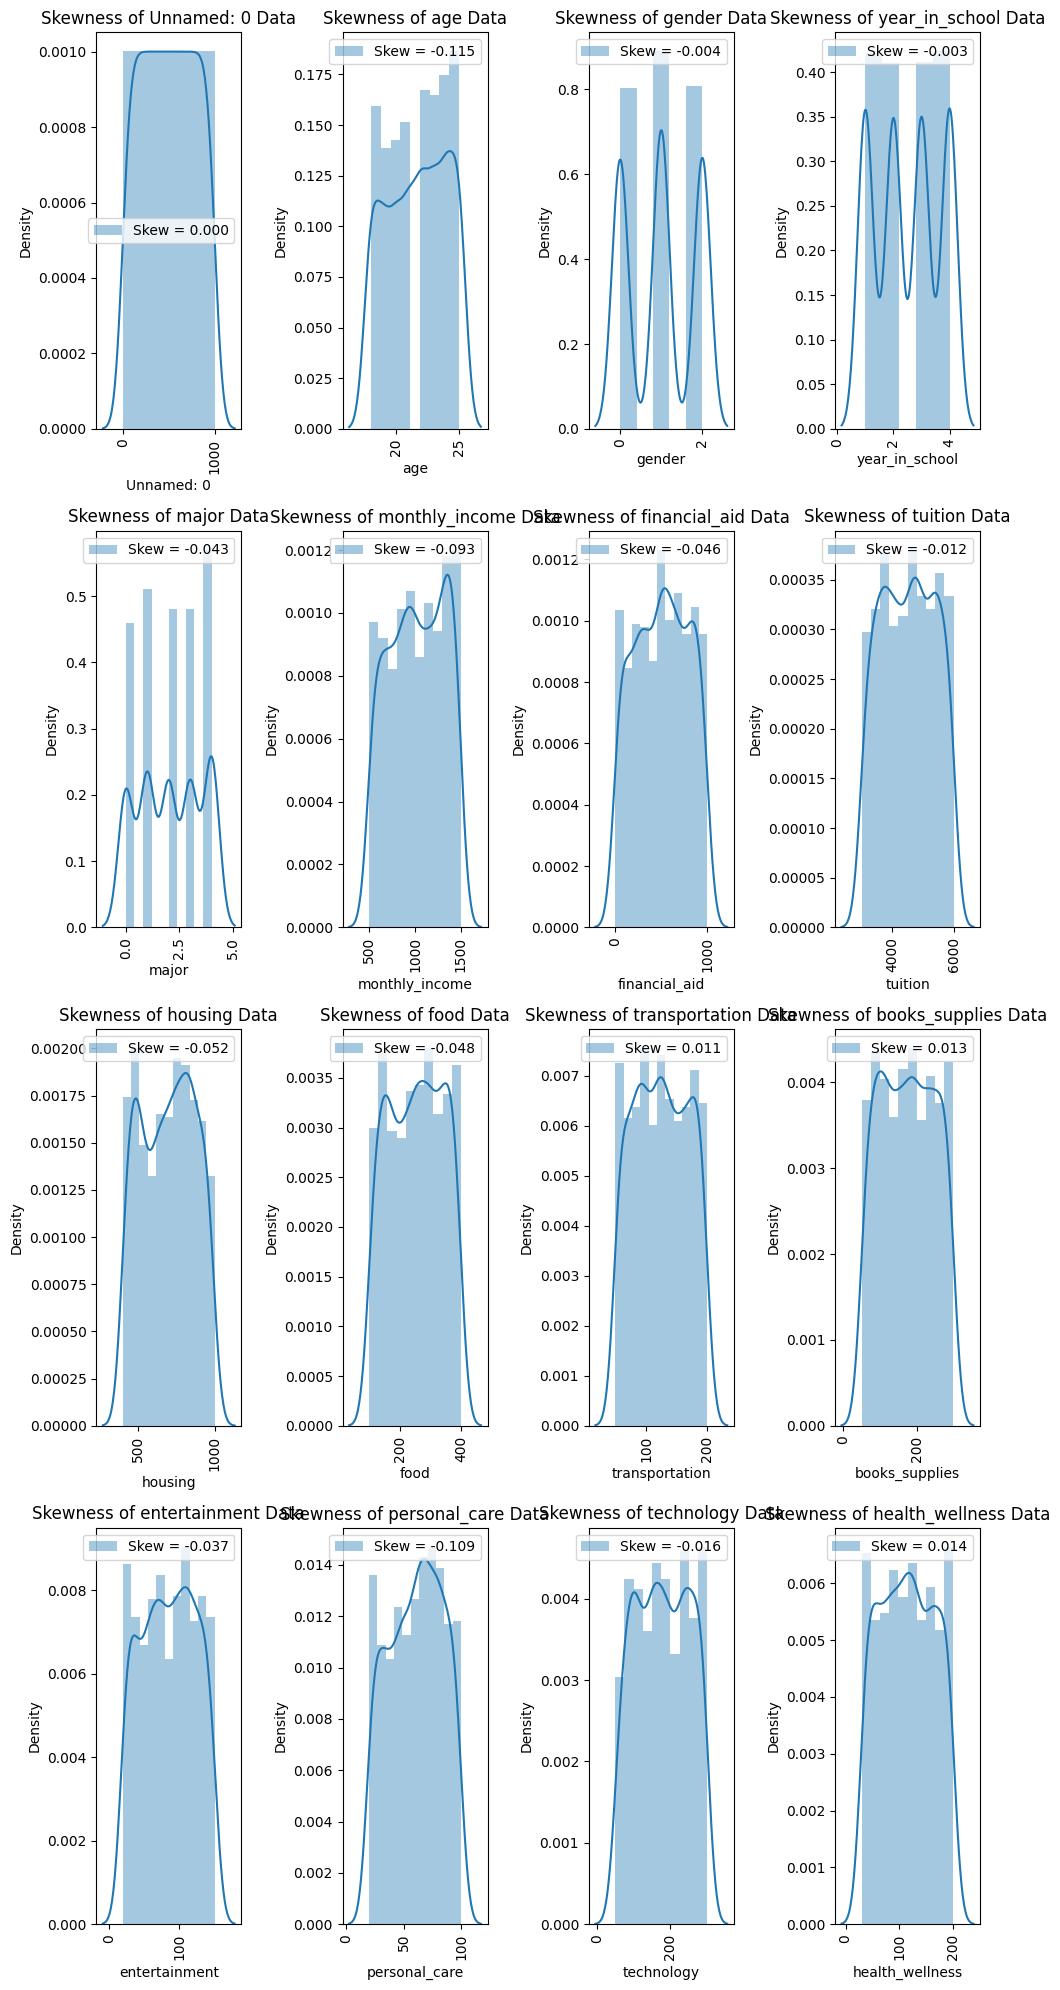

In [17]:
# Check outliers in all feature
plt.figure(figsize = (10, 20))
for i, col in enumerate(df.columns[:-1], 1):
    plt.subplot(4, 4, i)
    skewness = df[col].skew()
    sns.distplot(df[col], kde = True, label = "Skew = %.3f" %(skewness))
    plt.title(f"Skewness of {col} Data")
    plt.tight_layout()
    plt.legend(loc = "best")
    plt.xticks(rotation = 90)
    plt.plot()

In [18]:
# Drop identifier columns such as Unnamed: 0
df = df.drop('Unnamed: 0', axis=1)

In [ ]:
# Check final dataset to see if there are any null values and make sure all values are integers
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   age                       1000 non-null   int64
 1   gender                    1000 non-null   int64
 2   year_in_school            1000 non-null   int64
 3   major                     1000 non-null   int64
 4   monthly_income            1000 non-null   int64
 5   financial_aid             1000 non-null   int64
 6   tuition                   1000 non-null   int64
 7   housing                   1000 non-null   int64
 8   food                      1000 non-null   int64
 9   transportation            1000 non-null   int64
 10  books_supplies            1000 non-null   int64
 11  entertainment             1000 non-null   int64
 12  personal_care             1000 non-null   int64
 13  technology                1000 non-null   int64
 14  health_wellness           1000 non-null  

In [20]:
# We remove rows where total_spending is extremely high (e.g., > 99th percentile)
# This prevents one "millionaire student" entry from skewing the prediction for everyone.
if 'total_spending' in df.columns:
    upper_limit = df['total_spending'].quantile(0.99)
    df = df[df['total_spending'] <= upper_limit]

In [21]:
# Save processed dataset
df.to_csv('preprocessed_student_spending.csv')